#  IRIS FLOWERS CLASSIFICATION MACHINE LEARNING

### LGMVIP - DATA SCIENCE

### BATCH - APR 2023

###### Intern's Name : Sujeet R. Patil

#### Import important Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
%matplotlib inline

#### Import Dataset

In [2]:
iris = pd.read_csv("C:/Users/HP/Downloads/Iris.csv")

###### Inspecting the data

In [3]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.shape

(150, 6)

In [5]:
iris.size

900

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Data Cleaning

***Droping less important columns***

In [9]:
iris = iris.drop('Id', axis = 1)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Exploratory Data Analysis

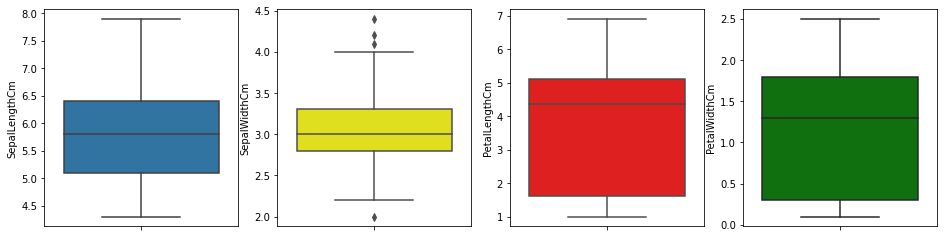

In [11]:
#checking for outliers
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data = iris, y = "SepalLengthCm")
plt.subplot(1,4,2)
sns.boxplot(data = iris, y = "SepalWidthCm", color = 'yellow')
plt.subplot(1,4,3)
sns.boxplot(data = iris, y = "PetalLengthCm", color = 'red')
plt.subplot(1,4,4)
sns.boxplot(data = iris, y = "PetalWidthCm", color = 'green')
plt.show()

### Visualization

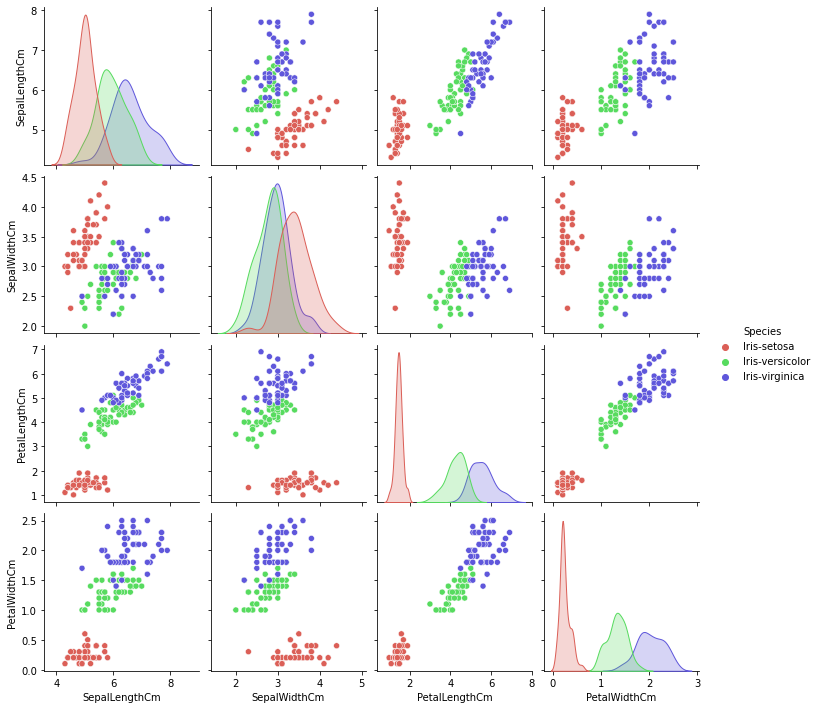

In [12]:
sns.pairplot(iris, hue = 'Species', palette = 'hls')

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

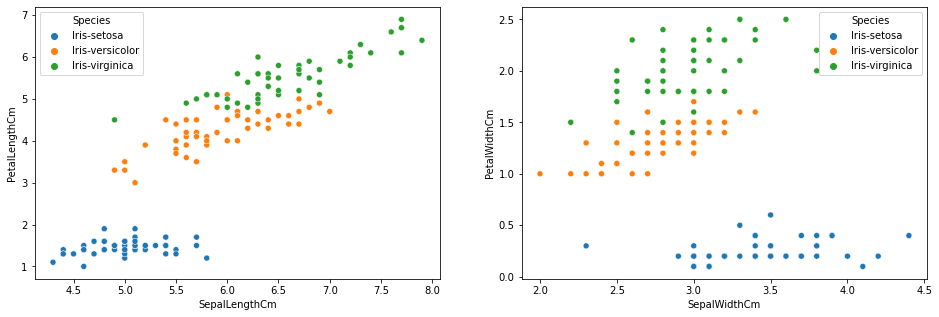

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,5))
sns.scatterplot(x = "SepalLengthCm", y = "PetalLengthCm", hue = 'Species', data = iris, ax = ax1)
sns.scatterplot(x = "SepalWidthCm", y = "PetalWidthCm", hue = 'Species', data = iris, ax = ax2)

### Correlation matrix

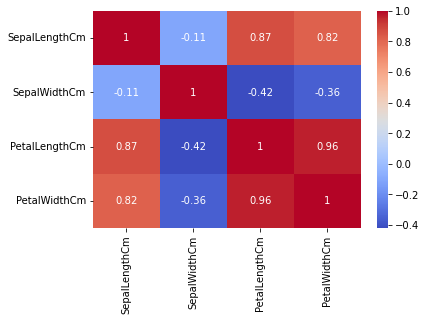

In [14]:
sns.heatmap(iris.corr(), annot = True, cmap = "coolwarm")
plt.show()

### Insights
- From the box plot it is clear that sepal width has some outliers.
- From the scatter plot it is clear that one class(iris-setosa) is away from other two classes(iris-versicolor and iris-virginics).
- From the correlation matrix it is clear that petal length and petal width is highly correlated.

### Spliting the data into Training and Testing

In [15]:
x = iris.drop(['Species'],1)
x.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_13880\2002714055.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = iris.drop(['Species'],1)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y = iris['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

### Model 1: Logistics Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression 

In [19]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
Predection_1 = lr_model.predict(x_test)


In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, Predection_1)*100)

100.0


### Model 2 : Decision Tree Classifier


In [22]:
from sklearn.tree import DecisionTreeClassifier


In [23]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
Predection_2 = model_dtc.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, Predection_2)*100)

96.66666666666667


*with the help of visualization part we can see the different clusters of respective iris flower species...!*

#### with the help of logistic regression model and Decision Tree classifier model i got different result 100% and 96.6% accuracy respectively !

## Thank you!